Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
import pandas as pd
from statsmodels.stats.power import TTestIndPower
from google.colab import drive


Veri Yükleme

In [ ]:
# Google Drive'ı mount edin
drive.mount('/content/drive')

# CSV dosyasını okuyun
file_path = "/content/drive/MyDrive/Colab Notebooks/data_cleaning/sora_cleaned_sonhali.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Power Analizi Parametreleri

Power analizi için gerekli parametreleri belirleyin:

    Etki Büyüklüğü (Effect Size): 0.5 (Orta büyüklükte etki)
    Anlamlılık Düzeyi (Significance Level, α): 0.05
    Güç (Power, 1-β): 0.80 ve 0.90

Örneklem Büyüklüğünün Hesaplanması

In [ ]:
# Parameters for the power analysis
effect_size = 0.8  # high effect size
alpha = 0.03  # significance level
power_80 = 0.8  # desired power for 80%
power_90 = 0.90  # desired power for 90%

# Perform power analysis to determine the required sample size for 80% power
analysis = TTestIndPower()
required_sample_size_80 = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power_80)

# Perform power analysis to determine the required sample size for 90% power
required_sample_size_90 = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power_90)

required_sample_size_80, required_sample_size_90


(29.558296966405905, 38.43809438190675)

Toplam Örneklem Büyüklüğünün Hesaplanması
Altı kategori için gerekli toplam örneklem büyüklüğünü hesaplayın:

In [ ]:
# Number of categories
num_categories = 6

# Total sample size for each power level
total_sample_size_80 = required_sample_size_80 * num_categories
total_sample_size_90 = required_sample_size_90 * num_categories

total_sample_size_80, total_sample_size_90


(177.34978179843543, 230.6285662914405)

# **177 ile 230 arasında, sample sayısı 200 seçildi.**

Sonuçların Gösterilmesi

In [ ]:
print(f"Her bir kategori için %80 güç hedefiyle gerekli örneklem büyüklüğü: {required_sample_size_80:.2f}")
print(f"Her bir kategori için %90 güç hedefiyle gerekli örneklem büyüklüğü: {required_sample_size_90:.2f}")

print(f"Toplamda %80 güç için gerekli örneklem büyüklüğü: {total_sample_size_80:.2f}")
print(f"Toplamda %90 güç için gerekli örneklem büyüklüğü: {total_sample_size_90:.2f}")


Her bir kategori için %80 güç hedefiyle gerekli örneklem büyüklüğü: 29.56
Her bir kategori için %90 güç hedefiyle gerekli örneklem büyüklüğü: 38.44
Toplamda %80 güç için gerekli örneklem büyüklüğü: 177.35
Toplamda %90 güç için gerekli örneklem büyüklüğü: 230.63


Formüller

    Etki Büyüklüğü (Effect Size): Cohen’s d=μ1−μ2σCohen’s d=σμ1​−μ2​​
    Anlamlılık Düzeyi (α): Genellikle 0.05
    Güç (1-β): Genellikle 0.80 veya 0.90

Örneklem Büyüklüğünün Hesaplanması İçin Kullanılan Fonksiyon

    solve_power: solve_power(effect_size, alpha, power) fonksiyonu, belirli bir etki büyüklüğü, anlamlılık düzeyi ve güç için gerekli örneklem büyüklüğünü hesaplar.



# GROUND TRUTH ISLEMLERI

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
?classification_report

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/newData_predicted_data/newDATA_predictedResults.csv')

In [ ]:
combined_df = combined_df.head(200)

In [ ]:
combined_df.head()

,text,emotions
0,let s with creativity one of the last enjoymen...,joy
1,can we get a remake of the rock eating,anger
2,anyone here from,anger
3,first one to come up with a genuine biotic ver...,joy
4,i cant wait for this to be to the public it wi...,joy


In [ ]:
ground_truh_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ground_truth/groundtruth - cleaned_2sora_cleaned_2.csv')

In [ ]:
ground_truh_df= ground_truh_df.head(200)

In [ ]:
ground_truh_df.head()


,text,newdata,ekmann
0,let s with creativity one of the last enjoymen...,joy,joy
1,can we get a remake of the rock eating,surprise,surprise
2,anyone here from,joy,neutral
3,first one to come up with a genuine biotic ver...,joy,neutral
4,i cant wait for this to be to the public it wi...,joy,joy


In [ ]:
ground_truh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     200 non-null    object
 1   newdata  200 non-null    object
 2   ekmann   200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
combined_df = pd.concat([ground_truh_df, combined_df['emotions']], axis=1)

In [ ]:
ekman_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ekman_predicted_data/ekman_predicted_df.csv')

In [ ]:
ekman_df = ekman_df.head(200)

In [ ]:
ekman_df = ekman_df.rename(columns={'emotions': 'ekmanPredict'})

In [ ]:
ekman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          200 non-null    object
 1   ekmanPredict  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [ ]:
combined_df = pd.concat([combined_df, ekman_df['ekmanPredict']], axis=1)

In [ ]:
combined_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ground_truth/son_df.csv', index=False)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          200 non-null    object
 1   newdata       200 non-null    object
 2   ekmann        200 non-null    object
 3   emotions      200 non-null    object
 4   ekmanPredict  200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


# Ground Truth Sonuçları


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
analiz_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ground_truth/son_dfbuuuuu - son_df.csv')

In [ ]:
analiz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            200 non-null    object
 1   newdata         200 non-null    object
 2   ekmann          200 non-null    object
 3   newdataPredict  200 non-null    object
 4   ekmanPredict    200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [ ]:
# Print the count of each category
category_counts = analiz_df['newdata'].value_counts()
total_count = len(analiz_df)

# Print the counts and percentages in the specified format
for label, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"{label}: {count} ({percentage:.2f}%)")
    # Print the total number of data points

print(f"Total data points: {total_count}")

joy: 75 (37.50%)
sadness: 46 (23.00%)
anger: 30 (15.00%)
fear: 22 (11.00%)
surprise: 18 (9.00%)
love: 9 (4.50%)
Total data points: 200


In [ ]:
# Print the count of each category
category_counts = analiz_df['newdataPredict'].value_counts()
total_count = len(analiz_df)

# Print the counts and percentages in the specified format
for label, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"{label}: {count} ({percentage:.2f}%)")
    # Print the total number of data points

print(f"Total data points: {total_count}")

joy: 74 (37.00%)
sadness: 58 (29.00%)
anger: 39 (19.50%)
fear: 22 (11.00%)
surprise: 4 (2.00%)
love: 3 (1.50%)
Total data points: 200


In [ ]:
print(classification_report(analiz_df['newdata'], analiz_df['newdataPredict'], target_names = ['anger','fear','joy','love','sadness','surprise']))

# Accuracy hesaplama
accuracy = accuracy_score(analiz_df['newdata'],analiz_df['newdataPredict'] )
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

       anger       0.64      0.83      0.72        30
        fear       0.73      0.73      0.73        22
         joy       0.82      0.81      0.82        75
        love       1.00      0.33      0.50         9
     sadness       0.71      0.89      0.79        46
    surprise       1.00      0.22      0.36        18

    accuracy                           0.75       200
   macro avg       0.82      0.64      0.65       200
weighted avg       0.78      0.75      0.73       200

Accuracy: 0.75


In [ ]:
# Print the count of each category
category_counts = analiz_df['ekmann'].value_counts()
total_count = len(analiz_df)

# Print the counts and percentages in the specified format
for label, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"{label}: {count} ({percentage:.2f}%)")
    # Print the total number of data points

print(f"Total data points: {total_count}")

joy: 63 (31.50%)
neutral: 47 (23.50%)
sadness: 31 (15.50%)
anger: 22 (11.00%)
surprise: 16 (8.00%)
fear: 13 (6.50%)
disgust: 8 (4.00%)
Total data points: 200


In [ ]:
print(classification_report(analiz_df['ekmann'], analiz_df['ekmanPredict'], target_names = ['anger','disgust','fear','joy', 'neutral', 'sadness','surprise']))

# Accuracy hesaplama
accuracy = accuracy_score(analiz_df['ekmann'],analiz_df['ekmanPredict'] )
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

       anger       0.53      0.36      0.43        22
     disgust       0.50      0.12      0.20         8
        fear       0.83      0.38      0.53        13
         joy       0.82      0.73      0.77        63
     neutral       0.54      0.96      0.69        47
     sadness       0.80      0.26      0.39        31
    surprise       0.54      0.94      0.68        16

    accuracy                           0.64       200
   macro avg       0.65      0.54      0.53       200
weighted avg       0.69      0.64      0.61       200

Accuracy: 0.64


In [ ]:
confusion_matrix = metrics.confusion_matrix(analiz_df['ekmann'], analiz_df['ekmanPredict'])

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['anger','disgust','fear','joy', 'neutral', 'sadness','surprise'])

In [ ]:
import matplotlib.pyplot as plt

***EKMANN CONFUSION MATRIX***

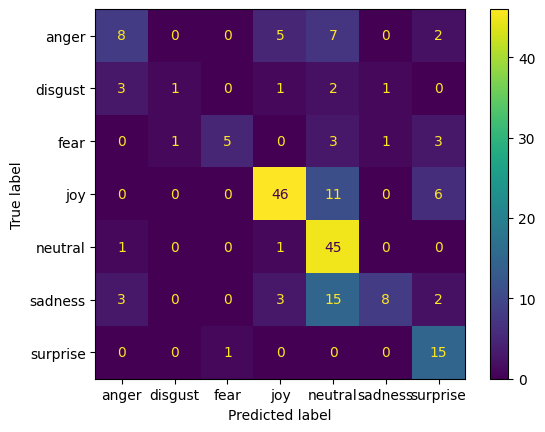

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
confusion_matrix = metrics.confusion_matrix(analiz_df['newdata'], analiz_df['newdataPredict'])

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['anger','fear','joy','love','sadness','surprise'])

EMOTIONS CONFUSION MATRIX

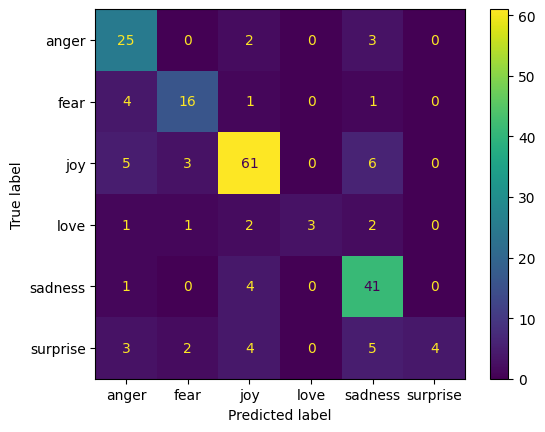

In [ ]:
cm_display.plot()
plt.show()